In [1]:
#Import libraries
from sklearn.cluster import AffinityPropagation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
#import collated dataset and add County as index
data = pd.read_csv('data_wk8.csv')
data.head()
data = data.set_index('County', drop=True)

In [4]:
#create features as a numpy arrary
X = np.array(data[['%_65+', '%_Black', '%_Indigenous', '%_Asian', '%_Pacific_Is', '%_Hispanic', '%_White', '%_Rural', 
         '%_Est_poverty', '%_Dem_votes', '%_Rep_votes', '%_Lib_votes', 'Cases/Pop']])

#turn numpy array of features in a separate dataframe
data2 = pd.DataFrame(X)

In [5]:
#calculate correlation matrix
corr = data.corr()

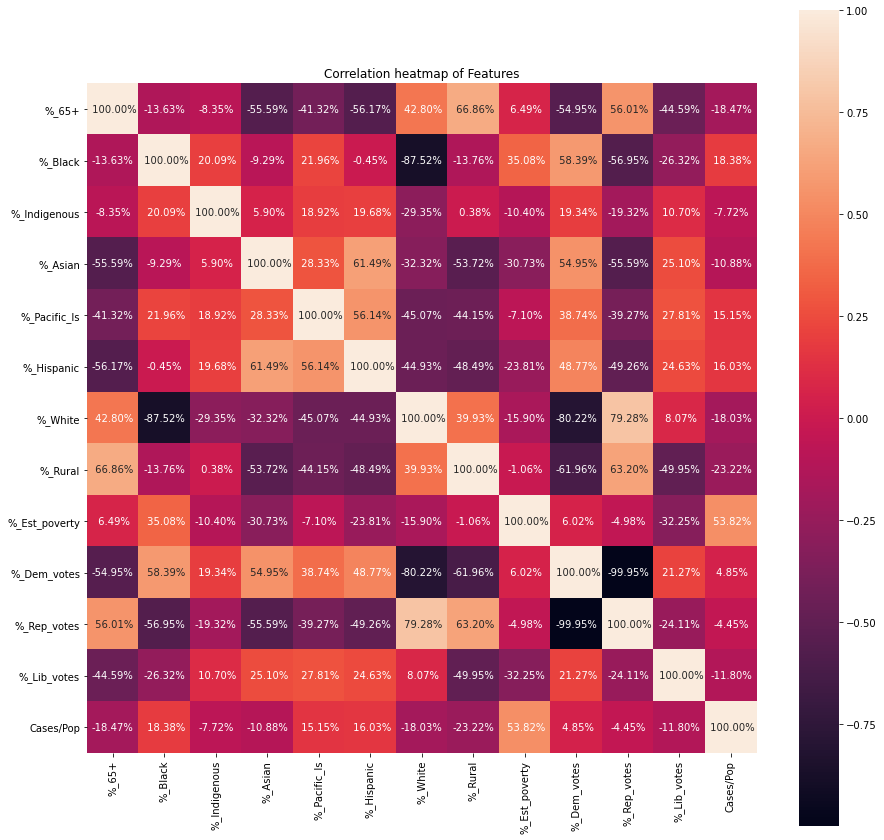

In [6]:
#plot correlation matrix
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr, square=True, annot=True, fmt=' .2%')
plt.title('Correlation heatmap of Features')
plt.savefig('Correlation heatmap of Features.png')
plt.show()

In [7]:
#Initiate Affinity propagation
clt = AffinityPropagation(damping=.5,max_iter=500, affinity='euclidean', random_state=0, verbose=True)

In [8]:
#fit numpy array of features and print number of clusters. 
#Note: as percentages, all features are on the same scale already, otherwise do feature scalling first
model = clt.fit(X)
n_clusters_ = len(model.cluster_centers_indices_)
print("Number of clusters: ",n_clusters_)

Converged after 26 iterations.
Number of clusters:  10


In [9]:
#predict clusters
clusters = pd.DataFrame(model.fit_predict(X))

#Add cluster lables to original dataframe
labels = clt.labels_
data['Cluster'] = labels

Converged after 26 iterations.


In [10]:
#review dataframe
data

,%_65+,%_Black,%_Indigenous,%_Asian,%_Pacific_Is,%_Hispanic,%_White,%_Rural,%_Est_poverty,%_Dem_votes,%_Rep_votes,%_Lib_votes,Cases/Pop,Cluster
County,,,,,,,,,,,,,,
Accomack County,23.565346,27.971122,0.694187,0.780575,0.172776,9.339134,59.971615,100.000000,16.4,44.676335,54.073812,1.108360,4.871652,3
Albemarle County,18.624331,9.430821,0.383561,5.585092,0.092901,5.949337,76.601851,45.022734,6.7,65.678890,32.175944,1.568276,2.271013,8
Alexandria city,11.502523,21.999626,0.634772,6.730829,0.143898,16.748894,51.752320,0.000000,8.6,80.270477,17.624605,1.238473,4.148757,5
Alleghany County,24.694836,4.600939,0.288397,0.288397,0.087190,1.462106,91.482227,52.393846,11.5,27.343655,71.425088,1.084969,3.930248,6
Amelia County,19.795589,20.387305,0.576347,0.614770,0.046108,2.858680,74.171982,100.000000,9.3,30.542184,68.279706,1.013428,2.551295,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Williamsburg city,16.326531,15.272556,0.516917,6.370838,0.134264,7.028733,67.783298,0.000000,18.2,69.521045,28.490566,1.335269,2.322771,5
Winchester city,15.888715,10.562829,0.921446,2.760780,0.117404,18.379109,65.365732,0.000000,13.3,54.569471,43.102452,1.758441,5.194251,2
Wise County,18.233716,5.642955,0.199937,0.434073,0.007892,1.239082,91.418499,56.670366,20.4,18.718026,80.445381,0.650015,4.535410,6


In [11]:
#print lists of counties by cluster
cluster_centers_indices = clt.cluster_centers_indices_
from collections import defaultdict
clusternames = defaultdict(list)
for i, label in enumerate(labels):
    clusternames[label].append(data.index[i])
for k, v in clusternames.items():
    print(k, v)

3 ['Accomack County', 'Buckingham County', 'Charlotte County', 'Cumberland County', 'King and Queen County', 'Lancaster County', 'Lunenburg County', 'Northampton County', 'Northumberland County', 'Richmond County', 'Southampton County', 'Surry County']
8 ['Albemarle County', 'Amherst County', 'Campbell County', 'Clarke County', 'Culpeper County', 'Fauquier County', 'Fluvanna County', 'Frederick County', 'Gloucester County', 'Greene County', 'Hanover County', 'Henry County', 'Isle of Wight County', 'King George County', 'Orange County', 'Warren County']
5 ['Alexandria city', 'Arlington County', 'Charlottesville city', 'Fairfax County', 'Fairfax city', 'Falls Church city', 'Harrisonburg city', 'Loudoun County', 'Manassas Park city', 'Manassas city', 'Prince William County', 'Williamsburg city']
6 ['Alleghany County', 'Augusta County', 'Bedford County', 'Botetourt County', 'Giles County', 'Page County', 'Pulaski County', 'Rockingham County', 'Shenandoah County', 'Smyth County', 'Tazewell 

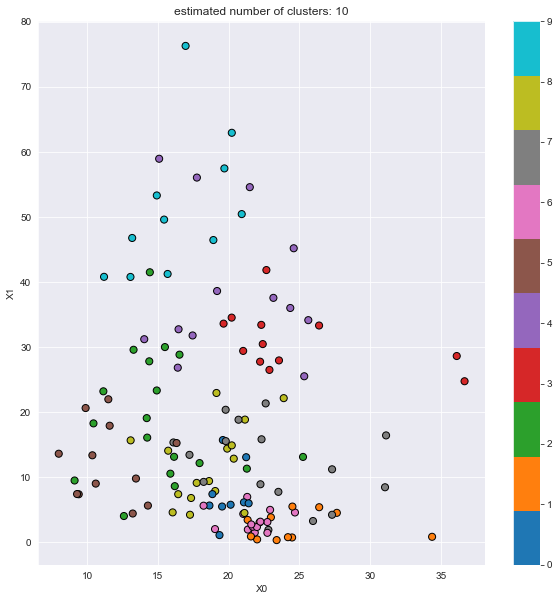

In [15]:
#plot Affinity propagation clusters
import matplotlib
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cmap = matplotlib.cm.get_cmap('tab10')
scatter = ax.scatter(data2[0], data2[1],  c=data['Cluster'], s=50, cmap=cmap, edgecolor='k')
#ax.set_title('Affinity propagation Clustering')
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.title("estimated number of clusters: %d" % n_clusters_)
plt.savefig('Estimated Number of Clusters: 10')
plt.show()

In [14]:
#Save dataset with cluster labels
data.to_csv('data_with_clusters_wk8.csv')